In [1]:
!dir inputs

 Volume in drive D has no label.
 Volume Serial Number is F6A2-5568

 Directory of D:\PythonTraining\Trading\ipynb\inputs

2021/06/19  14:27    <DIR>          .
2021/06/19  14:27    <DIR>          ..
2021/05/04  21:14                48 .gitignore
2021/05/27  20:44         1,767,851 EURJPY_M15_202004010000_202105271430.csv
2021/05/27  20:43         1,762,809 EURUSD_M15_202004010000_202105271430.csv
2021/06/19  14:27           178,895 GBPJPY_H1_202101040000_202106182300.csv
2021/05/27  20:44         1,773,816 GBPJPY_M15_202004010000_202105271430.csv
2021/06/19  14:27           710,465 GBPJPY_M15_202101040000_202106182345.csv
2021/06/19  14:27         2,112,497 GBPJPY_M5_202101040000_202106182350.csv
2021/05/27  20:44         1,765,556 GBPUSD_M15_202004010000_202105271430.csv
2021/06/01  21:52         1,712,377 NI225_M15.csv
2021/05/02  12:30                87 NI225_M15.csv.dvc
2021/06/01  21:53         1,568,974 US500_M15.csv
2021/05/31  19:20         4,642,686 US500_M5.csv
2021/05/04  2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import mplfinance as mpf
%matplotlib inline
sns.set()

In [52]:
def conv_tick(file_name):
    train = pd.read_csv('inputs/'+file_name, sep='\t')
    train.columns = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Vol', 'Spread']
    train2 = train.copy()
    train2['DateTime'] = pd.to_datetime(train2['Date'] + ' ' + train2['Time'])
    train2 = train2.set_index('DateTime').drop(['Date', 'Time'], axis=1)
    
    max_9 = train2['High'].rolling(window=9, min_periods=1).max()
    min_9 = train2['Low'].rolling(window=9, min_periods=1).min()

    max_26 = train2['High'].rolling(window=26, min_periods=1).max()
    min_26 = train2['Low'].rolling(window=26, min_periods=1).min()
    
    max_52 = train2['High'].rolling(window=52).max()
    min_52 = train2['Low'].rolling(window=52).min()

    train2['tenkan'] = (max_9 + min_9)/2
    train2['base'] = (max_26 + min_26)/2
    train2['senkou1'] = ((train2['tenkan'] + train2['base'])/2).iloc[:-26]
    train2['senkou2'] = ((max_52 + min_52)/2).iloc[:-26]    
    train2['chikou'] = train2['Close'].iloc[:-26]
    
    train2['sma20'] = train2['Close'].rolling(window=20, min_periods=1).mean()
    train2['sma50'] = train2['Close'].rolling(window=50, min_periods=1).mean()
    train2['sma100'] = train2['Close'].rolling(window=100, min_periods=1).mean()
    
    return train2


In [53]:
tick_m5 = conv_tick('GBPJPY_M5_202101040000_202106182350.csv')
tick_m15 = conv_tick('GBPJPY_M15_202101040000_202106182345.csv')
tick_h1 = conv_tick('GBPJPY_H1_202101040000_202106182300.csv')


In [80]:
def plot_tick(tick):
#     tmp = tick.copy()
#     max_9 = tmp['High'].rolling(window=9, min_periods=1).max()
#     min_9 = tmp['Low'].rolling(window=9, min_periods=1).min()

#     max_26 = tmp['High'].rolling(window=26, min_periods=1).max()
#     min_26 = tmp['Low'].rolling(window=26, min_periods=1).min()
    
#     max_52 = tmp['High'].rolling(window=52).max()
#     min_52 = tmp['Low'].rolling(window=52).min()

#     tmp['tenkan'] = (max_9 + min_9)/2
#     tmp['base'] = (max_26 + min_26)/2
#     tmp['senkou1'] = ((tmp['tenkan'] + tmp['base'])/2).iloc[:-26]
#     tmp['senkou2'] = ((max_52 + min_52)/2).iloc[:-26]    
#     tmp['chikou'] = tmp['Close'].iloc[:-26]
    
    add_plot = [
        mpf.make_addplot(tick['sma20'], color='red'),
        mpf.make_addplot(tick['sma50'], color='blue'),
        mpf.make_addplot(tick['sma100'], color='orange')
    ]

    mpf.plot(
        tick,
        type = 'candle',
        addplot = add_plot,
        figratio = (10,5),
        hlines=dict(hlines=[155.035, 155.22], colors=['g', 'g'], linewidths=[3, 3], alpha=0.7),
        style = 'starsandstripes',
        fill_between = dict(y1=tick['senkou1'].values, y2=tick['senkou2'].values, alpha=0.5, color='gray')
    )

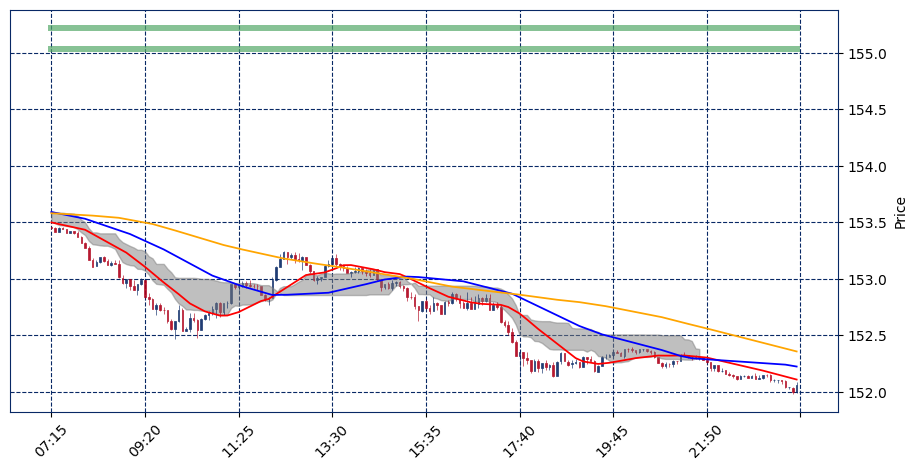

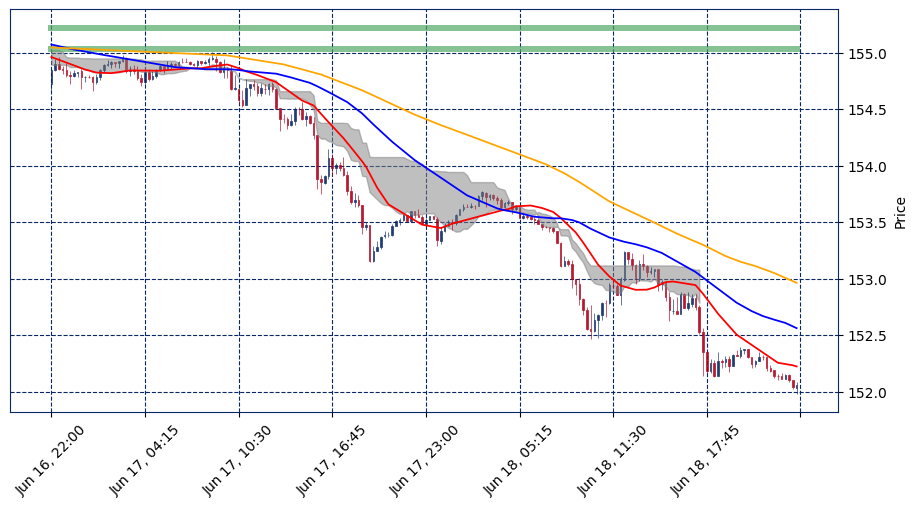

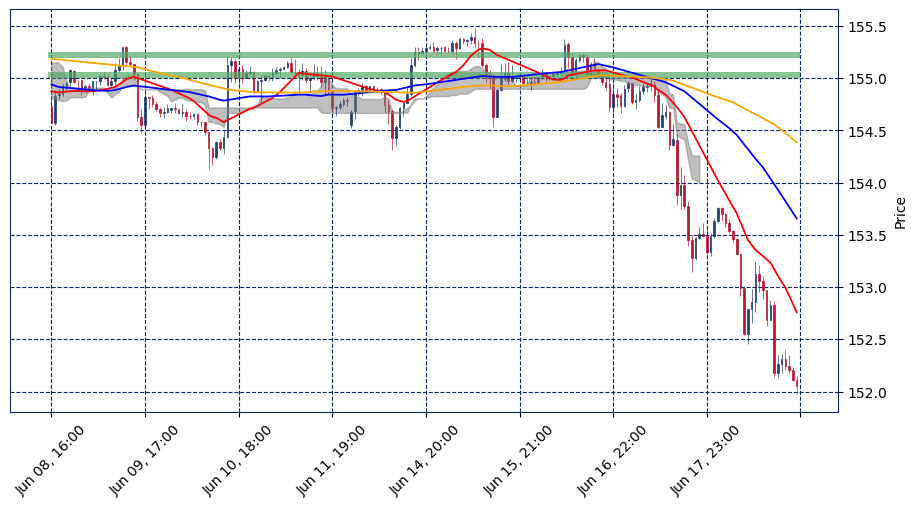

In [83]:
end = -650
start = end - 200

for idx, i in enumerate([tick_m5, tick_m15, tick_h1]):
    if idx == 0:
        plot_tick(i[-200:])
    if idx == 1:
        plot_tick(i[-200:])
    if idx == 2:
        plot_tick(i[-200:])


In [9]:
tick_h1.sort_values('High', ascending=False)

,Open,High,Low,Close,Volume,Vol,Spread
DateTime,,,,,,,
2021-05-27 20:00:00,155.777,156.071,155.733,155.997,4965,0,6
2021-05-27 21:00:00,155.998,156.070,155.932,156.025,3769,0,6
2021-05-28 03:00:00,155.955,156.058,155.955,155.980,3285,0,6
2021-05-28 01:00:00,155.958,156.048,155.958,156.014,797,0,10
2021-05-28 02:00:00,156.013,156.038,155.946,155.955,1269,0,7
...,...,...,...,...,...,...,...
2021-01-05 16:00:00,139.625,139.866,139.598,139.810,8188,0,6
2021-01-05 15:00:00,139.767,139.827,139.535,139.625,7557,0,6
2021-01-05 12:00:00,139.572,139.809,139.565,139.758,5643,0,6


In [10]:
# OPEN CLOSEを縦につなげて、その上位を抽出して平均の幅を計算して、その上でサポートラインの判定をする